# Project Titanic - Machine Learning from Disaster

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.set_index(train_df.PassengerId, inplace = True)

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.drop("PassengerId", axis=1, inplace = True)

In [9]:
test_df = pd.read_csv('./data/test.csv', index_col = "PassengerId")
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Categorical: Survived, Sex, Embarked, Pclass (ordinal), SibSp, Parch
### Numerical: (continuos) Age, Fare, (discrete)
### Mix types of data: Ticket, Cabin
### Contain Error/ Typo: Name
### Blank or Null: Cabin > Age > Embarked 
### Various Data Type: String, Int, Float

In [11]:
train_df['Survived'] = train_df['Survived'].astype('category')

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [13]:
features = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']

def convert_cat(df, features):
    for feature in features:
        df[feature] = df[feature].astype('category')
convert_cat(train_df, features)
convert_cat(test_df, features)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [15]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


# Distribution of Categorical features

In [16]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


# Exploratory Data Analysis (EDA)

In [17]:
train_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [18]:
%pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [19]:
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [20]:
from ydata_profiling import ProfileReport
profile = ProfileReport(
        train_df, 
        title="Titanic Report Train", 
        explorative=True, 
        minimal=False # false - tạo báo cáo đầy đủ nhất # true - tạo báo cáo tối thiểu 
    )
html_filename = "titanic_report_train.html"
profile.to_file(html_filename)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████| 11/11 [00:00<00:00, 206893.92it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [21]:
from ydata_profiling import ProfileReport
profile = ProfileReport(
        test_df, 
        title="Titanic Report Test", 
        explorative=True, 
        minimal=False # false - tạo báo cáo đầy đủ nhất # true - tạo báo cáo tối thiểu 
    )
html_filename = "titanic_report_test.html"
profile.to_file(html_filename)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████| 10/10 [00:00<00:00, 208671.84it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Feature Engineering & Data Wrangling

## Name columns

In [22]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [23]:
import re

def extract_title(name):
    pattern = re.compile(r" ([A-Za-z]+)\.")
    match = pattern.search(name)
    if match:
        return match.group(1)
    return ""

In [24]:
train_df['Title'] = train_df['Name'].apply(extract_title)

In [25]:
train_df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [26]:
test_df['Title'] = test_df['Name'].apply(extract_title)

In [27]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [28]:
def group_title(title):
    if title in ['Mr', 'Miss', 'Mrs', 'Master']:
        return title
    elif title == 'Ms':
        return 'Miss'
    else:
        return 'Rare'

In [29]:
train_df['Title'] = train_df['Title'].apply(group_title)
train_df['Title'].value_counts()

Title
Mr        517
Miss      183
Mrs       125
Master     40
Rare       26
Name: count, dtype: int64

In [30]:
test_df['Title'] = test_df['Title'].apply(group_title)

In [31]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       79
Mrs        72
Master     21
Rare        6
Name: count, dtype: int64

In [32]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

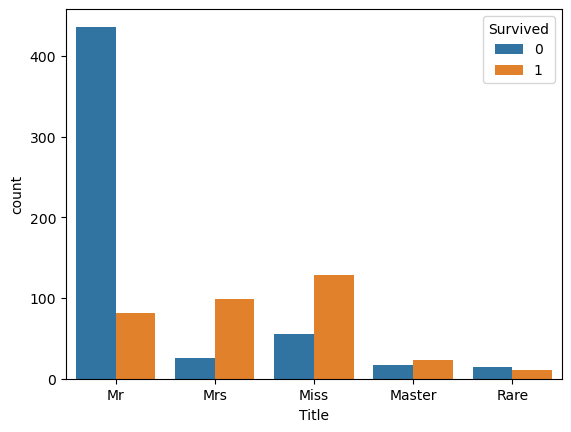

In [33]:
sns.countplot(data=train_df, x='Title', hue='Survived');
plt.show()

In [34]:
train_df['Family_size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int')

In [35]:
train_df['Family_size'].value_counts()

Family_size
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [36]:
test_df['Family_size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int')
test_df['Family_size'].value_counts()

Family_size
0     253
1      74
2      57
3      14
4       7
6       4
10      4
5       3
7       2
Name: count, dtype: int64

<Axes: xlabel='Family_size', ylabel='count'>

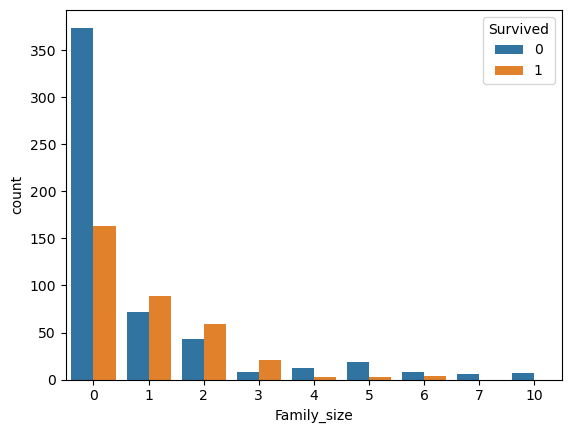

In [37]:
sns.countplot(data=train_df, x='Family_size', hue='Survived')

In [38]:
train_df['Family_cat'] = pd.cut(train_df['Family_size'], bins=[-1,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large'])

In [39]:
test_df['Family_cat'] = pd.cut(test_df['Family_size'], bins=[-1,1,4,6,20], labels=['Solo', 'Small', 'Medium', 'Large'])

<Axes: xlabel='Family_cat', ylabel='count'>

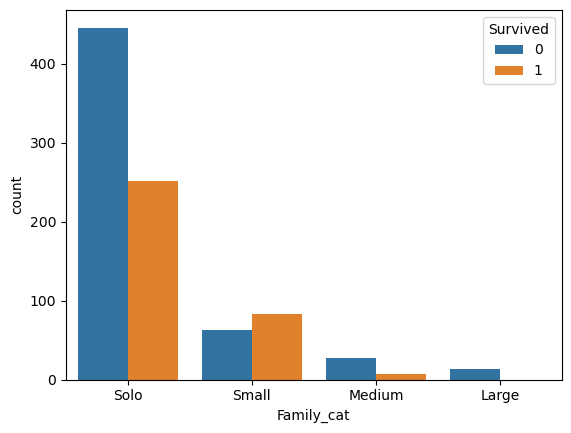

In [40]:
sns.countplot(data=train_df, x='Family_cat', hue='Survived')

In [41]:
num_features = ['Age', 'Fare']
cat_features = ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_cat']
feature_cols = num_features + cat_features

print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_cat']


In [42]:
def display_missing(df, feature_cols):
    n_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f'{col} has {missing_count*100/n_rows:.2f}% missing_values.')

In [43]:
display_missing(train_df, feature_cols)
print('---------')
display_missing(test_df, feature_cols)

Age has 19.87% missing_values.
Embarked has 0.22% missing_values.
---------
Age has 20.57% missing_values.
Fare has 0.24% missing_values.


## Filling missing values

### Age

In [44]:
# chia tuổi theo cột giới tính và hạng vé
# suy nghĩ: cột 
age_by_sex_pclass = train_df.groupby(['Sex', 'Pclass'], observed = True)['Age'].median()

In [45]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [46]:
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'], observed=True)['Age'].transform(lambda x: x.fillna(x.median()))

In [47]:
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'], observed=True)['Age'].transform(lambda x: x.fillna(x.median()))

In [48]:
display_missing(train_df, feature_cols)
print('---------')
display_missing(test_df, feature_cols)

Embarked has 0.22% missing_values.
---------
Fare has 0.24% missing_values.


In [49]:
# Features và targets
X = train_df[feature_cols]
y = train_df['Survived']

In [50]:
X_test = test_df[feature_cols]

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

In [52]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_cat'])])

In [53]:
X = preprocessor.transform(X) # X -> X_train, X_val
X_test = preprocessor.transform(X_test)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### LAZYCLASSIFIER

In [55]:
from lazypredict.Supervised import LazyClassifier

In [56]:
clf = LazyClassifier(
    verbose=0,
    ignore_warnings=True,
    custom_metric=None,
    predictions=True
)

models, predictions = clf.fit(X_train, X_val, y_train, y_val)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [57]:
print(models)

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.85               0.85     0.85      0.85   
LGBMClassifier                     0.85               0.84     0.84      0.85   
LabelPropagation                   0.84               0.83     0.83      0.84   
LabelSpreading                     0.84               0.83     0.83      0.84   
RandomForestClassifier             0.83               0.83     0.83      0.83   
RidgeClassifierCV                  0.82               0.81     0.81      0.82   
RidgeClassifier                    0.82               0.81     0.81      0.82   
NuSVC                              0.82               0.81     0.81      0.82   
LogisticRegression                 0.82               0.81     0.81      0.82   
LinearDiscriminantAnalysis         0.82               0.81     0.81      0.82   
LinearSVC                   

In [58]:
best_model_name = models.index[0]
best_accuracy = models.iloc[0]['Accuracy']
print(f"\n🥇 Mô hình tốt nhất: {best_model_name}")
print(f"🎯 Accuracy: {best_accuracy:.4f}")


🥇 Mô hình tốt nhất: XGBClassifier
🎯 Accuracy: 0.8547


In [59]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [60]:
xgb_basic = XGBClassifier()
xgb_basic.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [61]:
y_pred_basic = xgb_basic.predict(X_val)
basic_accuracy = accuracy_score(y_val, y_pred_basic)

In [62]:
print(f"✅ XGBClassifier cơ bản - Accuracy: {basic_accuracy:.4f} ({basic_accuracy*100:.2f}%)")

✅ XGBClassifier cơ bản - Accuracy: 0.8547 (85.47%)


In [63]:
print(classification_report(y_val, y_pred_basic))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       105
           1       0.83      0.81      0.82        74

    accuracy                           0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.85      0.85      0.85       179



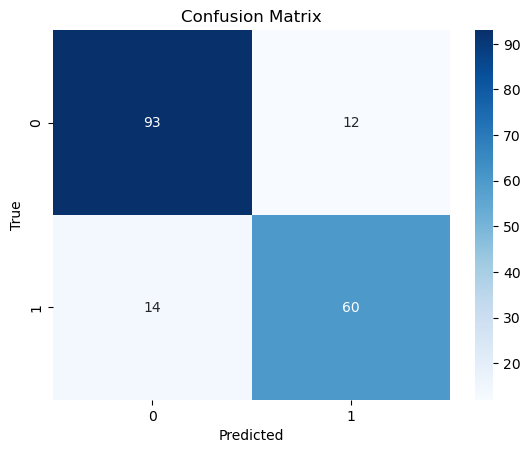

In [64]:
cm = confusion_matrix(y_val, y_pred_basic)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()   

#### Hyperparameter Tuning

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [3,4,5],
    'learning_rate': [0.05,0.1,0.2]
}

grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [67]:
print('Best parameters found: ', grid_search.best_params_)

Best parameters found:  {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


In [68]:
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_val)
print('Accuracy sau khi tinh chinh: ', accuracy_score(y_val, y_pred_tuned))

Accuracy sau khi tinh chinh:  0.8212290502793296


### Huan luyen tren toan bo tap X

In [69]:
preprocessor.fit(train_df[feature_cols])
X_full_proccessed = preprocessor.transform(train_df[feature_cols])
X_test_proccessed = preprocessor.transform(test_df[feature_cols])

final_model = XGBClassifier()
final_model.fit(X_full_proccessed, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [70]:
test_predictions = final_model.predict(X_test_proccessed)

In [71]:
submission_df = pd.DataFrame({
    'PassengerId': test_df.index,
    'Survived': test_predictions
})

In [73]:
submission_df.to_csv('my_xgb.csv',index=False)
print("Done")

Done
